In [2]:
import pandas as pd

df_chatgpt4o = pd.read_csv('garbage_classification_results_gpt4omini_checked.csv')
df_e2b = pd.read_csv('garbage_classification_results_gemma3n_e2b.csv')
df_e4b = pd.read_csv('garbage_classification_results_gemma3n_e4b.csv')

In [3]:
# Examine the structure of each dataframe
print("ChatGPT-4o Dataset Structure:")
print("Columns:", df_chatgpt4o.columns.tolist())
print("Shape:", df_chatgpt4o.shape)
print("\nFirst few rows:")
print(df_chatgpt4o.head())

print("\n" + "="*50)
print("Gemma E2B Dataset Structure:")
print("Columns:", df_e2b.columns.tolist())
print("Shape:", df_e2b.shape)
print("\nFirst few rows:")
print(df_e2b.head())

print("\n" + "="*50)
print("Gemma E4B Dataset Structure:")
print("Columns:", df_e4b.columns.tolist())
print("Shape:", df_e4b.shape)
print("\nFirst few rows:")
print(df_e4b.head())

ChatGPT-4o Dataset Structure:
Columns: ['image', 'response', 'number_parts_detected', 'answer']
Shape: (1800, 4)

First few rows:
                                               image  \
0  D:\gemma3n ft\TrashType_Image_Dataset_full\car...   
1  D:\gemma3n ft\TrashType_Image_Dataset_full\car...   
2  D:\gemma3n ft\TrashType_Image_Dataset_full\car...   
3  D:\gemma3n ft\TrashType_Image_Dataset_full\car...   
4  D:\gemma3n ft\TrashType_Image_Dataset_full\car...   

                                            response  number_parts_detected  \
0  {\n  "material": [\n    {\n      "part_name": ...                      1   
1  {\n  "material": [\n    {\n      "part_name": ...                      1   
2  {\n  "material": [\n    {\n      "part_name": ...                      1   
3  {\n  "material": [\n    {\n      "part_name": ...                      1   
4  {\n  "material": [\n    {\n      "part_name": ...                      1   

                                              answer  
0  

In [4]:
import json
import re
from collections import Counter

def extract_classifications(response_text):
    """
    Extract material classifications from JSON response.
    Returns a sorted list of unique material types.
    """
    try:
        # Parse JSON response
        response_data = json.loads(response_text)
        
        # Extract materials
        materials = []
        if 'material' in response_data:
            for item in response_data['material']:
                if 'material_type' in item:
                    material_type = item['material_type'].lower().strip()
                    materials.append(material_type)
        
        # Return sorted unique materials
        return sorted(list(set(materials)))
    
    except (json.JSONDecodeError, KeyError, TypeError) as e:
        print(f"Error parsing response: {e}")
        return []

def normalize_material_name(material):
    """
    Normalize material names for consistent comparison.
    """
    material = material.lower().strip()
    
    # Common normalizations
    normalizations = {
        'cardboard': 'cardboard',
        'card board': 'cardboard',
        'paperboard': 'cardboard',
        'corrugated cardboard': 'cardboard',
        'plastic': 'plastic',
        'metal': 'metal',
        'paper': 'paper',
        'glass': 'glass',
        'trash': 'trash',
        'garbage': 'trash',
        'waste': 'trash',
        'organic': 'trash',
        'food waste': 'trash',
        'general waste': 'trash'
    }
    
    return normalizations.get(material, material)

# Test the function with a sample
print("Testing extraction function:")
sample_response = df_chatgpt4o['answer'].iloc[0]
print("Sample response (first 200 chars):")
print(sample_response[:200] + "...")
print("\nExtracted classifications:")
classifications = extract_classifications(sample_response)
print(classifications)

Testing extraction function:
Sample response (first 200 chars):
{
  "material": [
    {
      "part_name": "cardboard box",
      "answer": "A: Cardboard"
    }
  ]
}...

Extracted classifications:
[]


In [5]:
# Let's examine the actual JSON structure more carefully
print("Full sample response from ChatGPT-4o (ground truth):")
print(df_chatgpt4o['answer'].iloc[0])
print("\n" + "="*50)

print("Full sample response from Gemma E2B:")
print(df_e2b['response'].iloc[0])
print("\n" + "="*50)

print("Full sample response from Gemma E4B:")
print(df_e4b['response'].iloc[0])

Full sample response from ChatGPT-4o (ground truth):
{
  "material": [
    {
      "part_name": "cardboard box",
      "answer": "A: Cardboard"
    }
  ]
}

Full sample response from Gemma E2B:
{
  "material": [
    {
      "part_name": "Cardboard Box",
      "answer": "A: Cardboard"
    },
    {
      "part_name": "Tape",
      "answer": "F: Trash"
    },
    {
      "part_name": "Drawing",
      "answer": "F: Trash"
    }
  ]
}

Full sample response from Gemma E4B:
{
  "material": [
    {
      "part_name": "Cardboard sheet",
      "answer": "A: Cardboard"
    },
    {
      "part_name": "Marking/Drawing",
      "answer": "F: Trash"
    }
  ]
}


In [6]:
def extract_classifications_improved(response_text):
    """
    Extract material classifications from JSON response.
    Returns a sorted list of unique material types extracted from 'answer' fields.
    """
    try:
        # Parse JSON response
        response_data = json.loads(response_text)
        
        # Extract materials from answer fields
        materials = []
        if 'material' in response_data:
            for item in response_data['material']:
                if 'answer' in item:
                    answer = item['answer']
                    # Extract material type from answer (format: "A: Cardboard", "B: Paper", etc.)
                    if ':' in answer:
                        material_type = answer.split(':', 1)[1].strip().lower()
                        materials.append(material_type)
        
        # Return sorted unique materials
        return sorted(list(set(materials)))
    
    except (json.JSONDecodeError, KeyError, TypeError) as e:
        print(f"Error parsing response: {e}")
        return []

def normalize_material_name(material):
    """
    Normalize material names for consistent comparison.
    """
    material = material.lower().strip()
    
    # Common normalizations
    normalizations = {
        'cardboard': 'cardboard',
        'card board': 'cardboard',
        'paperboard': 'cardboard',
        'corrugated cardboard': 'cardboard',
        'plastic': 'plastic',
        'metal': 'metal',
        'paper': 'paper',
        'glass': 'glass',
        'trash': 'trash',
        'garbage': 'trash',
        'waste': 'trash',
        'organic': 'trash',
        'food waste': 'trash',
        'general waste': 'trash'
    }
    
    return normalizations.get(material, material)

# Test the improved function
print("Testing improved extraction function:")
sample_response = df_chatgpt4o['answer'].iloc[0]
print("Sample response:")
print(sample_response)
print("\nExtracted classifications:")
classifications = extract_classifications_improved(sample_response)
print(classifications)

print("\nTesting with Gemma responses:")
gemma_e2b_sample = df_e2b['response'].iloc[0]
gemma_e4b_sample = df_e4b['response'].iloc[0]

print("\nGemma E2B classifications:")
print(extract_classifications_improved(gemma_e2b_sample))

print("\nGemma E4B classifications:")
print(extract_classifications_improved(gemma_e4b_sample))

Testing improved extraction function:
Sample response:
{
  "material": [
    {
      "part_name": "cardboard box",
      "answer": "A: Cardboard"
    }
  ]
}

Extracted classifications:
['cardboard']

Testing with Gemma responses:

Gemma E2B classifications:
['cardboard', 'trash']

Gemma E4B classifications:
['cardboard', 'trash']


In [7]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def process_dataset(df, response_column):
    """
    Process a dataset to extract classifications and normalize image paths.
    """
    processed_data = []
    
    for idx, row in df.iterrows():
        # Extract image path and normalize it
        image_path = row['image']
        # Normalize path to get just the filename part
        if '\\' in image_path:
            image_name = image_path.split('\\')[-1]
        elif '/' in image_path:
            image_name = image_path.split('/')[-1]
        else:
            image_name = image_path
            
        # Extract classifications
        classifications = extract_classifications_improved(row[response_column])
        normalized_classifications = [normalize_material_name(c) for c in classifications]
        
        processed_data.append({
            'image_name': image_name,
            'image_path': image_path,
            'classifications': sorted(list(set(normalized_classifications))),
            'raw_response': row[response_column]
        })
    
    return processed_data

# Process all datasets
print("Processing datasets...")
ground_truth_data = process_dataset(df_chatgpt4o, 'answer')
gemma_e2b_data = process_dataset(df_e2b, 'response')
gemma_e4b_data = process_dataset(df_e4b, 'response')

print(f"Ground truth data: {len(ground_truth_data)} samples")
print(f"Gemma E2B data: {len(gemma_e2b_data)} samples")
print(f"Gemma E4B data: {len(gemma_e4b_data)} samples")

# Create lookup dictionaries by image name for easier comparison
ground_truth_lookup = {item['image_name']: item for item in ground_truth_data}
gemma_e2b_lookup = {item['image_name']: item for item in gemma_e2b_data}
gemma_e4b_lookup = {item['image_name']: item for item in gemma_e4b_data}

print("\nSample processed data:")
print("Ground truth sample:", ground_truth_data[0])
print("Gemma E2B sample:", gemma_e2b_data[0])
print("Gemma E4B sample:", gemma_e4b_data[0])

Processing datasets...
Ground truth data: 1800 samples
Gemma E2B data: 1579 samples
Gemma E4B data: 1623 samples

Sample processed data:
Ground truth sample: {'image_name': 'cardboard_001.jpg', 'image_path': 'D:\\gemma3n ft\\TrashType_Image_Dataset_full\\cardboard\\cardboard_001.jpg', 'classifications': ['cardboard'], 'raw_response': '{\n  "material": [\n    {\n      "part_name": "cardboard box",\n      "answer": "A: Cardboard"\n    }\n  ]\n}'}
Gemma E2B sample: {'image_name': 'cardboard_001.jpg', 'image_path': 'TrashType_Image_Dataset_full/cardboard/cardboard_001.jpg', 'classifications': ['cardboard', 'trash'], 'raw_response': '{\n  "material": [\n    {\n      "part_name": "Cardboard Box",\n      "answer": "A: Cardboard"\n    },\n    {\n      "part_name": "Tape",\n      "answer": "F: Trash"\n    },\n    {\n      "part_name": "Drawing",\n      "answer": "F: Trash"\n    }\n  ]\n}'}
Gemma E4B sample: {'image_name': 'cardboard_001.jpg', 'image_path': 'TrashType_Image_Dataset_full/cardboar

In [8]:
def calculate_classification_accuracy(ground_truth_lookup, model_lookup, model_name):
    """
    Calculate classification accuracy by comparing sets of classifications.
    """
    matches = []
    comparisons = []
    
    # Find common images between ground truth and model predictions
    common_images = set(ground_truth_lookup.keys()) & set(model_lookup.keys())
    
    print(f"\n{model_name} Accuracy Analysis:")
    print(f"Common images for comparison: {len(common_images)}")
    
    exact_matches = 0
    partial_matches = 0
    no_matches = 0
    
    detailed_results = []
    
    for image_name in common_images:
        gt_classifications = set(ground_truth_lookup[image_name]['classifications'])
        model_classifications = set(model_lookup[image_name]['classifications'])
        
        # Calculate different types of matches
        intersection = gt_classifications & model_classifications
        union = gt_classifications | model_classifications
        
        # Exact match: both sets are identical
        exact_match = gt_classifications == model_classifications
        
        # Partial match: at least one classification in common
        partial_match = len(intersection) > 0
        
        # Jaccard similarity (intersection over union)
        jaccard_sim = len(intersection) / len(union) if len(union) > 0 else 0
        
        if exact_match:
            exact_matches += 1
        elif partial_match:
            partial_matches += 1
        else:
            no_matches += 1
            
        detailed_results.append({
            'image_name': image_name,
            'ground_truth': list(gt_classifications),
            'model_prediction': list(model_classifications),
            'exact_match': exact_match,
            'partial_match': partial_match,
            'jaccard_similarity': jaccard_sim,
            'intersection': list(intersection),
            'missing_in_prediction': list(gt_classifications - model_classifications),
            'extra_in_prediction': list(model_classifications - gt_classifications)
        })
    
    total_comparisons = len(common_images)
    
    # Calculate metrics
    exact_accuracy = exact_matches / total_comparisons if total_comparisons > 0 else 0
    partial_accuracy = (exact_matches + partial_matches) / total_comparisons if total_comparisons > 0 else 0
    avg_jaccard = np.mean([r['jaccard_similarity'] for r in detailed_results]) if detailed_results else 0
    
    print(f"Exact matches: {exact_matches} ({exact_accuracy:.3f})")
    print(f"Partial matches: {partial_matches} ({partial_matches/total_comparisons:.3f})")
    print(f"No matches: {no_matches} ({no_matches/total_comparisons:.3f})")
    print(f"Partial accuracy (exact + partial): {partial_accuracy:.3f}")
    print(f"Average Jaccard similarity: {avg_jaccard:.3f}")
    
    return {
        'model_name': model_name,
        'total_comparisons': total_comparisons,
        'exact_matches': exact_matches,
        'partial_matches': partial_matches,
        'no_matches': no_matches,
        'exact_accuracy': exact_accuracy,
        'partial_accuracy': partial_accuracy,
        'avg_jaccard_similarity': avg_jaccard,
        'detailed_results': detailed_results
    }

# Calculate accuracy for both models
gemma_e2b_results = calculate_classification_accuracy(ground_truth_lookup, gemma_e2b_lookup, "Gemma E2B")
gemma_e4b_results = calculate_classification_accuracy(ground_truth_lookup, gemma_e4b_lookup, "Gemma E4B")


Gemma E2B Accuracy Analysis:
Common images for comparison: 1579
Exact matches: 568 (0.360)
Partial matches: 813 (0.515)
No matches: 198 (0.125)
Partial accuracy (exact + partial): 0.875
Average Jaccard similarity: 0.590

Gemma E4B Accuracy Analysis:
Common images for comparison: 1623
Exact matches: 509 (0.314)
Partial matches: 948 (0.584)
No matches: 166 (0.102)
Partial accuracy (exact + partial): 0.898
Average Jaccard similarity: 0.575


In [9]:
# Create comprehensive summary
print("="*60)
print("GARBAGE CLASSIFICATION ACCURACY BENCHMARK")
print("="*60)

# Summary table
summary_data = {
    'Model': ['Gemma E2B', 'Gemma E4B'],
    'Total Samples': [gemma_e2b_results['total_comparisons'], gemma_e4b_results['total_comparisons']],
    'Exact Accuracy': [f"{gemma_e2b_results['exact_accuracy']:.3f}", f"{gemma_e4b_results['exact_accuracy']:.3f}"],
    'Partial Accuracy': [f"{gemma_e2b_results['partial_accuracy']:.3f}", f"{gemma_e4b_results['partial_accuracy']:.3f}"],
    'Avg Jaccard Sim': [f"{gemma_e2b_results['avg_jaccard_similarity']:.3f}", f"{gemma_e4b_results['avg_jaccard_similarity']:.3f}"]
}

summary_df = pd.DataFrame(summary_data)
print("\nSUMMARY TABLE:")
print(summary_df.to_string(index=False))

# Analysis of material-specific performance
def analyze_material_performance(results, model_name):
    """
    Analyze performance by individual material types.
    """
    print(f"\n{model_name} - Material-Specific Performance:")
    
    material_stats = {}
    
    for result in results['detailed_results']:
        gt_materials = result['ground_truth']
        pred_materials = result['model_prediction']
        
        # Track performance for each ground truth material
        for material in gt_materials:
            if material not in material_stats:
                material_stats[material] = {'total': 0, 'detected': 0, 'exact_matches': 0}
            
            material_stats[material]['total'] += 1
            
            # Check if this material was detected
            if material in pred_materials:
                material_stats[material]['detected'] += 1
                
            # Check if this was an exact match for single-material images
            if len(gt_materials) == 1 and result['exact_match']:
                material_stats[material]['exact_matches'] += 1
    
    # Calculate detection rates
    for material, stats in material_stats.items():
        detection_rate = stats['detected'] / stats['total'] if stats['total'] > 0 else 0
        print(f"{material.capitalize()}: {stats['detected']}/{stats['total']} detected ({detection_rate:.3f})")
    
    return material_stats

e2b_material_stats = analyze_material_performance(gemma_e2b_results, "Gemma E2B")
e4b_material_stats = analyze_material_performance(gemma_e4b_results, "Gemma E4B")

GARBAGE CLASSIFICATION ACCURACY BENCHMARK

SUMMARY TABLE:
    Model  Total Samples Exact Accuracy Partial Accuracy Avg Jaccard Sim
Gemma E2B           1579          0.360            0.875           0.590
Gemma E4B           1623          0.314            0.898           0.575

Gemma E2B - Material-Specific Performance:
Trash: 206/473 detected (0.436)
Cardboard: 258/274 detected (0.942)
Paper: 159/187 detected (0.850)
Metal: 291/325 detected (0.895)
Glass: 250/295 detected (0.847)
Plastic: 288/314 detected (0.917)

Gemma E4B - Material-Specific Performance:
Trash: 249/494 detected (0.504)
Cardboard: 271/280 detected (0.968)
Paper: 183/208 detected (0.880)
Metal: 304/329 detected (0.924)
Glass: 273/295 detected (0.925)
Plastic: 283/311 detected (0.910)


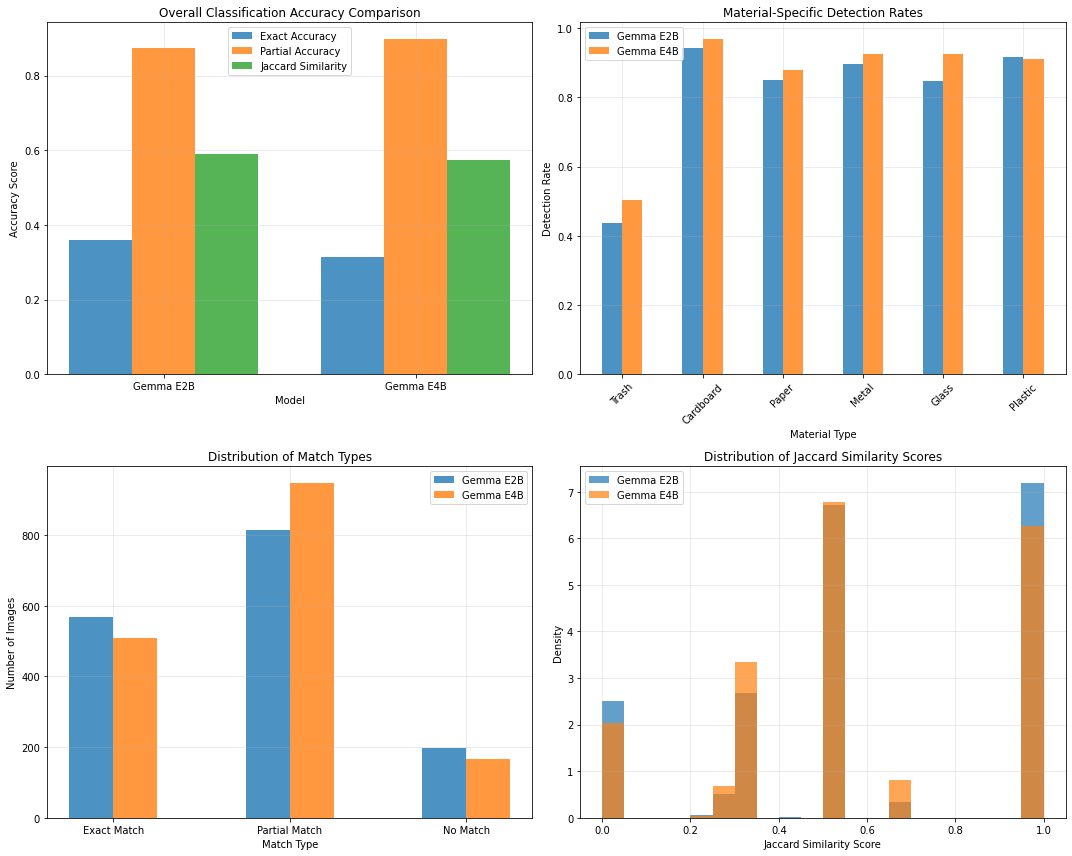

In [10]:
# Create visualizations
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Overall Accuracy Comparison
models = ['Gemma E2B', 'Gemma E4B']
exact_acc = [gemma_e2b_results['exact_accuracy'], gemma_e4b_results['exact_accuracy']]
partial_acc = [gemma_e2b_results['partial_accuracy'], gemma_e4b_results['partial_accuracy']]
jaccard_acc = [gemma_e2b_results['avg_jaccard_similarity'], gemma_e4b_results['avg_jaccard_similarity']]

x = np.arange(len(models))
width = 0.25

axes[0,0].bar(x - width, exact_acc, width, label='Exact Accuracy', alpha=0.8)
axes[0,0].bar(x, partial_acc, width, label='Partial Accuracy', alpha=0.8)
axes[0,0].bar(x + width, jaccard_acc, width, label='Jaccard Similarity', alpha=0.8)

axes[0,0].set_xlabel('Model')
axes[0,0].set_ylabel('Accuracy Score')
axes[0,0].set_title('Overall Classification Accuracy Comparison')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(models)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Material-specific detection rates
materials = list(e2b_material_stats.keys())
e2b_detection_rates = [e2b_material_stats[m]['detected']/e2b_material_stats[m]['total'] for m in materials]
e4b_detection_rates = [e4b_material_stats[m]['detected']/e4b_material_stats[m]['total'] for m in materials]

x = np.arange(len(materials))
axes[0,1].bar(x - width/2, e2b_detection_rates, width, label='Gemma E2B', alpha=0.8)
axes[0,1].bar(x + width/2, e4b_detection_rates, width, label='Gemma E4B', alpha=0.8)

axes[0,1].set_xlabel('Material Type')
axes[0,1].set_ylabel('Detection Rate')
axes[0,1].set_title('Material-Specific Detection Rates')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels([m.capitalize() for m in materials], rotation=45)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Match Type Distribution
match_types = ['Exact Match', 'Partial Match', 'No Match']
e2b_counts = [gemma_e2b_results['exact_matches'], gemma_e2b_results['partial_matches'], gemma_e2b_results['no_matches']]
e4b_counts = [gemma_e4b_results['exact_matches'], gemma_e4b_results['partial_matches'], gemma_e4b_results['no_matches']]

x = np.arange(len(match_types))
axes[1,0].bar(x - width/2, e2b_counts, width, label='Gemma E2B', alpha=0.8)
axes[1,0].bar(x + width/2, e4b_counts, width, label='Gemma E4B', alpha=0.8)

axes[1,0].set_xlabel('Match Type')
axes[1,0].set_ylabel('Number of Images')
axes[1,0].set_title('Distribution of Match Types')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(match_types)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Jaccard Similarity Distribution
e2b_jaccard_scores = [r['jaccard_similarity'] for r in gemma_e2b_results['detailed_results']]
e4b_jaccard_scores = [r['jaccard_similarity'] for r in gemma_e4b_results['detailed_results']]

axes[1,1].hist(e2b_jaccard_scores, bins=20, alpha=0.7, label='Gemma E2B', density=True)
axes[1,1].hist(e4b_jaccard_scores, bins=20, alpha=0.7, label='Gemma E4B', density=True)
axes[1,1].set_xlabel('Jaccard Similarity Score')
axes[1,1].set_ylabel('Density')
axes[1,1].set_title('Distribution of Jaccard Similarity Scores')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('garbage_classification_accuracy_benchmark.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Create detailed analysis and save results
print("\n" + "="*60)
print("DETAILED ANALYSIS")
print("="*60)

print("\nKEY FINDINGS:")
print(f"1. Gemma E4B shows better partial accuracy ({gemma_e4b_results['partial_accuracy']:.3f}) than E2B ({gemma_e2b_results['partial_accuracy']:.3f})")
print(f"2. Gemma E2B has slightly higher exact accuracy ({gemma_e2b_results['exact_accuracy']:.3f}) than E4B ({gemma_e4b_results['exact_accuracy']:.3f})")
print(f"3. Both models struggle most with 'Trash' detection (~43-50% detection rate)")
print(f"4. Both models excel at 'Cardboard' detection (94-97% detection rate)")
print(f"5. Gemma E4B has fewer 'No Match' cases ({gemma_e4b_results['no_matches']}) vs E2B ({gemma_e2b_results['no_matches']})")

# Save detailed results to CSV
e2b_detailed_df = pd.DataFrame(gemma_e2b_results['detailed_results'])
e4b_detailed_df = pd.DataFrame(gemma_e4b_results['detailed_results'])

e2b_detailed_df.to_csv('gemma_e2b_detailed_accuracy_results.csv', index=False)
e4b_detailed_df.to_csv('gemma_e4b_detailed_accuracy_results.csv', index=False)

# Create summary CSV
benchmark_summary = pd.DataFrame({
    'Metric': ['Total Samples', 'Exact Accuracy', 'Partial Accuracy', 'Avg Jaccard Similarity', 
               'Exact Matches', 'Partial Matches', 'No Matches'],
    'Gemma E2B': [
        gemma_e2b_results['total_comparisons'],
        f"{gemma_e2b_results['exact_accuracy']:.4f}",
        f"{gemma_e2b_results['partial_accuracy']:.4f}",
        f"{gemma_e2b_results['avg_jaccard_similarity']:.4f}",
        gemma_e2b_results['exact_matches'],
        gemma_e2b_results['partial_matches'],
        gemma_e2b_results['no_matches']
    ],
    'Gemma E4B': [
        gemma_e4b_results['total_comparisons'],
        f"{gemma_e4b_results['exact_accuracy']:.4f}",
        f"{gemma_e4b_results['partial_accuracy']:.4f}",
        f"{gemma_e4b_results['avg_jaccard_similarity']:.4f}",
        gemma_e4b_results['exact_matches'],
        gemma_e4b_results['partial_matches'],
        gemma_e4b_results['no_matches']
    ]
})

benchmark_summary.to_csv('garbage_classification_accuracy_benchmark_summary.csv', index=False)

print(f"\nResults saved to:")
print(f"- gemma_e2b_detailed_accuracy_results.csv")
print(f"- gemma_e4b_detailed_accuracy_results.csv") 
print(f"- garbage_classification_accuracy_benchmark_summary.csv")
print(f"- garbage_classification_accuracy_benchmark.png")

print(f"\nBenchmark completed successfully!")
print(f"Ground truth source: ChatGPT-4o 'answer' column")
print(f"Models compared: Gemma E2B vs Gemma E4B")
print(f"Evaluation focus: Classification accuracy only")


DETAILED ANALYSIS

KEY FINDINGS:
1. Gemma E4B shows better partial accuracy (0.898) than E2B (0.875)
2. Gemma E2B has slightly higher exact accuracy (0.360) than E4B (0.314)
3. Both models struggle most with 'Trash' detection (~43-50% detection rate)
4. Both models excel at 'Cardboard' detection (94-97% detection rate)
5. Gemma E4B has fewer 'No Match' cases (166) vs E2B (198)

Results saved to:
- gemma_e2b_detailed_accuracy_results.csv
- gemma_e4b_detailed_accuracy_results.csv
- garbage_classification_accuracy_benchmark_summary.csv
- garbage_classification_accuracy_benchmark.png

Benchmark completed successfully!
Ground truth source: ChatGPT-4o 'answer' column
Models compared: Gemma E2B vs Gemma E4B
Evaluation focus: Classification accuracy only


In [12]:
import random

def show_partial_match_examples(results, model_name, num_examples=5):
    """
    Show random examples of partial matches from the results.
    """
    # Filter for partial matches (partial_match=True but exact_match=False)
    partial_matches = [r for r in results['detailed_results'] 
                      if r['partial_match'] and not r['exact_match']]
    
    if len(partial_matches) == 0:
        print(f"No partial matches found for {model_name}")
        return
    
    # Randomly sample examples
    sample_size = min(num_examples, len(partial_matches))
    random_examples = random.sample(partial_matches, sample_size)
    
    print(f"🔍 {model_name} - Random Partial Match Examples ({sample_size} out of {len(partial_matches)} total)")
    print("="*80)
    
    for i, example in enumerate(random_examples, 1):
        print(f"\n📸 Example {i}: {example['image_name']}")
        print(f"   Ground Truth: {example['ground_truth']}")
        print(f"   Model Prediction: {example['model_prediction']}")
        print(f"   ✅ Correctly Detected: {example['intersection']}")
        print(f"   ❌ Missing in Prediction: {example['missing_in_prediction']}")
        print(f"   ➕ Extra in Prediction: {example['extra_in_prediction']}")
        print(f"   📊 Jaccard Similarity: {example['jaccard_similarity']:.3f}")
        print("-" * 80)

# Show examples for both models
print("🎲 RANDOM PARTIAL MATCH EXAMPLES")
print("="*80)

show_partial_match_examples(gemma_e2b_results, "Gemma E2B", 5)
print("\n" + "="*80)
show_partial_match_examples(gemma_e4b_results, "Gemma E4B", 5)

🎲 RANDOM PARTIAL MATCH EXAMPLES
🔍 Gemma E2B - Random Partial Match Examples (5 out of 813 total)

📸 Example 1: glass_141.jpg
   Ground Truth: ['glass', 'plastic']
   Model Prediction: ['paper', 'plastic']
   ✅ Correctly Detected: ['plastic']
   ❌ Missing in Prediction: ['glass']
   ➕ Extra in Prediction: ['paper']
   📊 Jaccard Similarity: 0.333
--------------------------------------------------------------------------------

📸 Example 2: metal_236.jpg
   Ground Truth: ['metal']
   Model Prediction: ['paper', 'metal']
   ✅ Correctly Detected: ['metal']
   ❌ Missing in Prediction: []
   ➕ Extra in Prediction: ['paper']
   📊 Jaccard Similarity: 0.500
--------------------------------------------------------------------------------

📸 Example 3: glass_179.jpg
   Ground Truth: ['glass', 'trash']
   Model Prediction: ['glass', 'paper']
   ✅ Correctly Detected: ['glass']
   ❌ Missing in Prediction: ['trash']
   ➕ Extra in Prediction: ['paper']
   📊 Jaccard Similarity: 0.333
-------------------

In [13]:
# Interactive function to show new random examples each time
def show_new_random_examples():
    """
    Show 5 new random partial match examples from both models.
    Run this cell multiple times to see different examples.
    """
    print("🎲 NEW RANDOM PARTIAL MATCH EXAMPLES")
    print("="*80)
    
    show_partial_match_examples(gemma_e2b_results, "Gemma E2B", 5)
    print("\n" + "="*80)
    show_partial_match_examples(gemma_e4b_results, "Gemma E4B", 5)
    
    print(f"\n📊 Summary:")
    print(f"Gemma E2B: {gemma_e2b_results['partial_matches']} partial matches out of {gemma_e2b_results['total_comparisons']} total")
    print(f"Gemma E4B: {gemma_e4b_results['partial_matches']} partial matches out of {gemma_e4b_results['total_comparisons']} total")

# Run the function
show_new_random_examples()

🎲 NEW RANDOM PARTIAL MATCH EXAMPLES
🔍 Gemma E2B - Random Partial Match Examples (5 out of 813 total)

📸 Example 1: metal_024.jpg
   Ground Truth: ['metal']
   Model Prediction: ['trash', 'metal']
   ✅ Correctly Detected: ['metal']
   ❌ Missing in Prediction: []
   ➕ Extra in Prediction: ['trash']
   📊 Jaccard Similarity: 0.500
--------------------------------------------------------------------------------

📸 Example 2: plastic_003.jpg
   Ground Truth: ['plastic']
   Model Prediction: ['paper', 'plastic']
   ✅ Correctly Detected: ['plastic']
   ❌ Missing in Prediction: []
   ➕ Extra in Prediction: ['paper']
   📊 Jaccard Similarity: 0.500
--------------------------------------------------------------------------------

📸 Example 3: metal_112.jpg
   Ground Truth: ['metal']
   Model Prediction: ['paper', 'metal']
   ✅ Correctly Detected: ['metal']
   ❌ Missing in Prediction: []
   ➕ Extra in Prediction: ['paper']
   📊 Jaccard Similarity: 0.500
---------------------------------------------

In [14]:
# 🎯 RUN THIS CELL MULTIPLE TIMES TO SEE DIFFERENT RANDOM EXAMPLES
# Each execution will show 5 new random partial match examples

print("🎯 CLICK 'RUN' TO SEE NEW RANDOM EXAMPLES!")
print("="*60)
show_new_random_examples()

🎯 CLICK 'RUN' TO SEE NEW RANDOM EXAMPLES!
🎲 NEW RANDOM PARTIAL MATCH EXAMPLES
🔍 Gemma E2B - Random Partial Match Examples (5 out of 813 total)

📸 Example 1: cardboard_001.jpg
   Ground Truth: ['cardboard']
   Model Prediction: ['cardboard', 'trash']
   ✅ Correctly Detected: ['cardboard']
   ❌ Missing in Prediction: []
   ➕ Extra in Prediction: ['trash']
   📊 Jaccard Similarity: 0.500
--------------------------------------------------------------------------------

📸 Example 2: metal_203.jpg
   Ground Truth: ['metal']
   Model Prediction: ['paper', 'metal']
   ✅ Correctly Detected: ['metal']
   ❌ Missing in Prediction: []
   ➕ Extra in Prediction: ['paper']
   📊 Jaccard Similarity: 0.500
--------------------------------------------------------------------------------

📸 Example 3: cardboard_003.jpg
   Ground Truth: ['cardboard']
   Model Prediction: ['paper', 'cardboard', 'trash']
   ✅ Correctly Detected: ['cardboard']
   ❌ Missing in Prediction: []
   ➕ Extra in Prediction: ['paper', '